# Assignment 3 - Decision Trees

Adam Ten Hoeve  
COMP 4448: Data Science Tools 2

In [48]:
# Load Required packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix, \
                            precision_score, recall_score, f1_score, plot_roc_curve, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Question 1

For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party. The file BlueOrRed.csv (provided on canvas)contains data on a sample of voters with tracked variables including: whether or not they are undecided regarding their candidate preference, age, whether they own a home, gender, marital status, household size, income, years of education, and whether they attend church. For this dataset, you would use the Undecided variable as your output variable and the rest of the variables as your input variables. You want to predict whether a candidate is undecided(Undecided=1) or decided(Undecided=0). 

a) Upload the data into Python and check for missing data. If there is any missing data, drop the cases that have the missing data. 

In [2]:
# Load the CSV into pandas dataframe
df = pd.read_csv("BlueOrRed.csv")
# Drop any rows that contain missing data
df.dropna(axis=0, inplace=True)
# Display the first 5 rows of dataframe
df.head(5)

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


b) Normalize the continuous variables using min-max normalization. You should obtain a new dataset that has your normalized continuous input variables, the categorical input variables (the categorical input variables are fine and don’t need to be normalized), and your output variable.

In [3]:
scaler = MinMaxScaler()
# Fit the scaler to the continuous variables
# Continuous variables are Age and Income
df[["Age", "Income"]] = scaler.fit_transform(df[["Age", "Income"]])
df.head(5)

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,4,0.306422,15,0,1
1,0.444444,1,1,1,6,0.763303,15,1,0
2,0.587302,1,0,1,6,0.234862,16,0,1
3,0.507937,1,0,1,4,0.025688,8,0,0
4,0.492063,1,1,1,2,0.113761,15,1,1


c)	Why do you think using min-max normalization is a better choice for this situation compared to using other scalers such as the Standard Scaler which standardizes the data?

Min-Max scaling allows us to scale the data without affecting the underlying distribution. The other scalers, such as the standard scaler, actually standardizes the data, which changes the underlying distribution to fit a (relatively) normal distribution. This means that the min-max scaler is the least disruptive scaler to the information of the original data.

d)	Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets. Your test set should be 30% of the entire data. Print the shape of the X_train, y_train, X_test and y_test data. You can use the default value of the random state in splitting the data, which is random_state=42. 

In [4]:
# Split the data into input and output data
X = df.drop("Undecided", axis=1)
y = df["Undecided"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shape of each set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 8)
(3000, 8)
(7000,)
(3000,)


e)	Construct a decision tree and fit the tree into the data. Then use your decision tree model to make predictions on the training set as well as on the test set. Assign your results to y_train_pred and y_test_pred respectively. Print out the first 100 predictions for each of the  y_train_pred and y_test_pred. 

In [5]:
# Create the Decision Tree
dt_clf = DecisionTreeClassifier()
# Fit the decision tree to the training data
dt_clf.fit(X_train, y_train)
# Predict on the training set
y_train_pred = dt_clf.predict(X_train)
print("First 100 training predictions:\n", y_train_pred[:100])
# Predict on the test set
y_test_pred = dt_clf.predict(X_test)
print("First 100 test predictions\n", y_test_pred[:100])

First 100 training predictions:
 [0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]
First 100 test predictions
 [0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


f)	Find the overall accuracy of the tree model on the training set and on the test set. Use the accuracy_score() function in the sklearn.metrics module. Does the tree overfit the model? Why or why not?  

In [6]:
# Find the accuracy on the training set
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
# Find the accuracy on the test set
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Training accuracy: 1.0
Test accuracy: 0.97


g)	Also, use the .score() method of the tree estimator to find the overall accuracy on the training set and test set. 

In [7]:
# Find the accuracy on the training set
print("Training accuracy:", dt_clf.score(X_train, y_train))
# Find the accuracy on the test set
print("Test accuracy:", dt_clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.97


h)	Use the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set. 

In [8]:
# Find the overall prediction error on the training set
print("Overall prediction error on training set:", zero_one_loss(y_train, y_train_pred))
# Find the overall prediction error on the test set
print("Overall prediction error on test set:", zero_one_loss(y_test, y_test_pred))

Overall prediction error on training set: 0.0
Overall prediction error on test set: 0.030000000000000027


# Question 2

a)	Generate the classification report using the classification_report () 

In [9]:
# Classification report on the test set
print("Classification Report on the test set\n:", classification_report(y_test, y_test_pred))

Classification Report on the test set
:               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1814
           1       0.96      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



b)	Generate the confusion matrix using confusion_matrix() 

In [10]:
# Confusion matrix of test set
print("Confusion matrix of test set:\n", confusion_matrix(y_test, y_test_pred))

Confusion matrix of test set:
 [[1765   49]
 [  41 1145]]


c)	Generate the precision score using precision_score() 

In [11]:
# Precision on test set
print("Precision score on test set:", precision_score(y_test, y_test_pred))

Precision score on test set: 0.958961474036851


d)	Generate the recall score using recall_score()

In [12]:
# Recall on test set
print("Recall score on test set:", recall_score(y_test, y_test_pred))

Recall score on test set: 0.9654300168634065


e)	Generate the f1 score using f1_score()

In [13]:
# F1 score on test set
print("F1 score on test set:", f1_score(y_test, y_test_pred))

F1 score on test set: 0.9621848739495799


g)	Generate a roc curve using plot_roc_curve() 

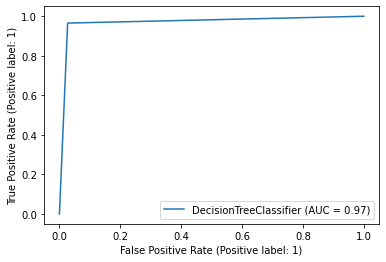

In [14]:
plot_roc_curve(dt_clf, X_test, y_test)

h)	Plot the confusion matrix using plot_confusion_matrix

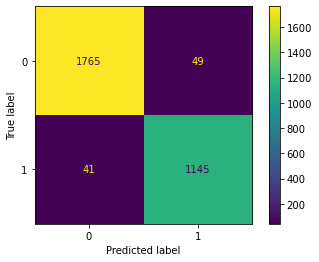

In [15]:
plot_confusion_matrix(dt_clf, X_test, y_test)

# Question 3

You will now use cross validation to find better accuracy scores as well as to tune your hyperparameters. The hyperparameters of a decision tree as shown below. We are more interested in optimizing the depth of the tree (max_depth). 

a)	First retrieve the maximum depth of this decision tree. Use clf.tree_.max_depth where clf is the name of your estimator and tree is the module in sklearn. 

In [16]:
print("Decision Tree Max Depth:", dt_clf.tree_.max_depth)

Decision Tree Max Depth: 18


b)	You will find the optimal depth of the tree by tuning the max_depth hyperparameter. Write a for loop to iteratively compute the overall error rate of the model on the test set only for the possible values of the maximum depth of the tree. Then plot the overall error rate on the y-axis and the maximum depth of the tree on the x-axis. Also use np.argmin() on the error rates you obtained to retrieve the optimal maximum depth of the tree with the least error rate. Does this value match with what you see on your plot? 

Text(0.5, 1.0, 'Decision Tree Error Rate vs. Tree Depth')

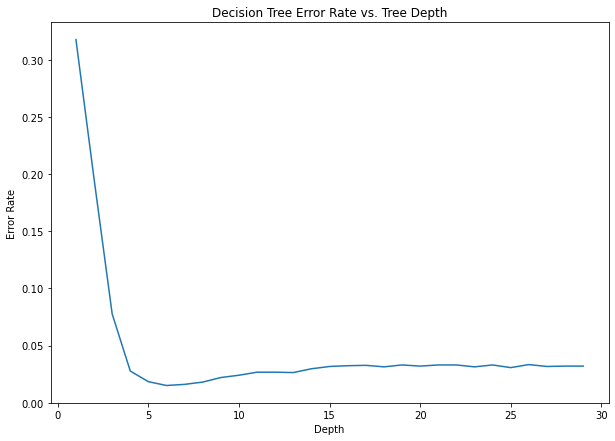

In [17]:
# Initialize vectors for the depths and their scores
depths = np.arange(1, 30)
errors = np.zeros(len(depths))
# Loop over all depths and calculate the accuracy of each model
for index, depth in enumerate(depths):
    # Fit a decision tree classifier with the specified max depth
    dt = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    # Predict on the test set
    preds = dt.predict(X_test)
    # Find the erro rate of the specified tree
    errors[index] = zero_one_loss(y_test, preds)
    
# Plot the error rate vs. tree depth
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.lineplot(x=depths, y=errors, ax=ax)
ax.set_xlabel("Depth")
ax.set_ylabel("Error Rate")
ax.set_title("Decision Tree Error Rate vs. Tree Depth")

In [18]:
# Find the Tree depth with the minimum error rate
print("Tree depth with minimum error rate:", depths[np.argmin(errors)])

Tree depth with minimum error rate: 6


c)	Now, you will still find the optimal maximum depth of the decision tree model using grid search cross validation. Additionally, you will be simultaneously optimizing the max_features hyperparameter as well. You can check the documentation to see what these hyperparameters represent. You will use the GridSearchCV() constructor inside the sklearn.model_selection module. Make sure to pass the arguments (estimator and param_grid into the GridSearchCV() constructor. Set the parameter cv=8. Do you have the same optimal maximum depth as you got in the question above?  

In [19]:
# Set the parameters to be explored by the gridsearch
param_grid = {"max_depth": range(1, dt_clf.tree_.max_depth),
              "max_features": [0.2, 0.4, 0.6, 0.8]}
# Use the grid search with the designated parameters
grid_clf = GridSearchCV(dt_clf, param_grid, cv=8)
# Fit the grid search to the training set
grid_clf.fit(X_train, y_train)
# Find the best parameters found by the gridsearch
print("Best parameters found by the gridsearch:", grid_clf.best_params_)

Best parameters found by the gridsearch: {'max_depth': 7, 'max_features': 0.8}


d)	You will tune the maximum depth hyperparameter again using cross validation but this time, you will use the cross_val_score() function inside the sklearn.model_selection module. You will use this cross_val_score() function in combination with a for loop to find the optimal maximum depth of the tree. Track the error rate for each depth and plot the error rates versus the corresponding maximum depths of the tree. Also use the np.argmin() on the error rates to retrieve the optimal maximum depth , corresponding to the lowest error rate. Does the retrieved optimal maximum depth look like what you see on your plot? 

Text(0.5, 1.0, 'Cross Validated Error Rate vs Max Tree Depth')

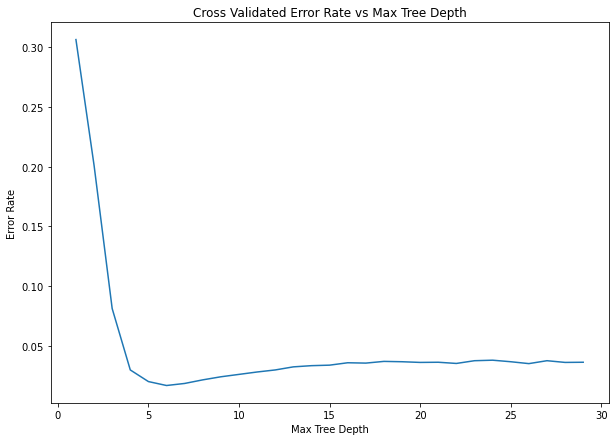

In [20]:
# We will use the same list of depths as before
depths = np.arange(1, 30)
errors = np.zeros(len(depths))
# Iterate over the list of depths to find the one the produces the model with the minimum error rate
for index, depth in enumerate(depths):
    # Create a decision tree with the specified depth, and fit it to the training set
    dt = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    # Record the accuracies of the decision tree for each fold
    scores = cross_val_score(estimator=dt, X=X_train, y=y_train, scoring="accuracy", cv=8)
    # Calculate the average error rate of the tree
    errors[index] = 1 - np.mean(scores)
# Plot the error rate vs tree depth
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.lineplot(x=depths, y=errors, ax=ax)
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Error Rate")
ax.set_title("Cross Validated Error Rate vs Max Tree Depth")

In [21]:
print("The Max Depth that resulted in the lowest accuracy:", depths[np.argmin(errors)])

The Max Depth that resulted in the lowest accuracy: 6


e)	You will use another approach to plot the error rates versus the maximum depth of the tree. Here, you would use the validation_curve() function inside the sklearn.model_selection module. This function implements cross validation and returns the training accuracy scores and test (validation) accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values. You will need to aggregate the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, for each hyperparameter value. Use these average accuracy scores to obtain corresponding error rates for the training and test (validation) sets. Then plot the error rates on the training set versus the maximum depth values. Also plot on the same figure, the error rates of the test (or validation) set versus the maximum depth values. What is the optimal maximum depth?

In [22]:
# Use the validation curve function to calcualte accuracies for each max_depth
scores = validation_curve(dt_clf, X_train, y_train, param_name="max_depth", param_range=np.arange(1, 30))
# Calculate the average training error for each max depth
train_errors = 1 - np.mean(scores[0], axis=1)
# Calculate the average test error for each max depth
test_errors = 1 - np.mean(scores[1], axis=1)

Text(0.5, 1.0, 'Decision Tree Error Rates vs Max Depth on Training Set')

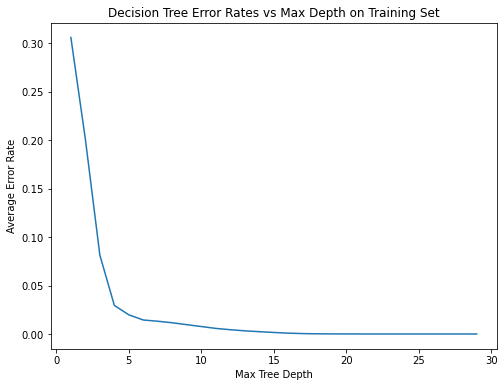

In [23]:
# Plot error rates for the training set
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(x=depths, y=train_errors, ax=ax)
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Average Error Rate")
ax.set_title("Decision Tree Error Rates vs Max Depth on Training Set")

Text(0.5, 1.0, 'Decision Tree Error Rates vs Max Depth on Test Set')

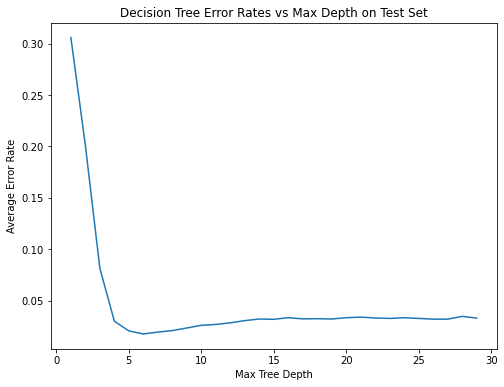

In [24]:
# Plot the error rates for the test set
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(x=depths, y=test_errors, ax=ax)
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Average Error Rate")
ax.set_title("Decision Tree Error Rates vs Max Depth on Test Set")

# Question 4

Find your own dataset suitable for classification with at least three input variables and 200 cases: You will build a decision tree classifier and a random forest classifier. Find some interesting dataset instead of the popular iris data, etc. 

Address the following and include code/output snippets from b) to f). Include the response under each sub question. 
1.	State your research question, for example: Are decision trees and random forest good models for predicting whether someone will default on a loan or not based on their age and income level? This is just an example, your dataset does not have to be (or should not be) about loans. 
2.	Data pre-processing (to the extent deemed necessary)
3.	Data splitting 
4.	Model construction (a decision tree and a random forest)
5.	Hyperparameter turning (for each model, tune the hyperparameter that is important to you and use any of the methods for hyperparameter tuning learned in class such as cross validation with for loop, gridsearch cross validation, etc. You could tune more than a single parameter for each model if you want). 
6.	Use the best or optimal parameter values to build a model, then compute the accuracy score for the decision tree and for the random forest). 
7.	Discuss about overfitting for both models and, also discuss which model is better for classification for your dataset and why? 


In [59]:
# Load in the smoking data
df_smoking = pd.read_csv("SmokeBan.csv")
# Drop the extra index column
df_smoking.drop("Unnamed: 0", axis=1, inplace=True)
df_smoking.head()

,smoker,ban,age,education,afam,hispanic,gender
0,yes,yes,41,hs,no,no,female
1,yes,yes,44,some college,no,no,female
2,no,no,19,some college,no,no,female
3,yes,no,29,hs,no,no,female
4,no,yes,28,some college,no,no,female


In [60]:
# Check for missing values
np.sum(df_smoking.isna(), axis=0)

smoker       0
ban          0
age          0
education    0
afam         0
hispanic     0
gender       0
dtype: int64

In [80]:
# Convert categorical variables to Dummy variables
df_clean = pd.get_dummies(df_smoking[["smoker", "ban", "education", "afam", "hispanic", "gender"]], drop_first=True)
# Add a scaled version of Age to the data
scaler = MinMaxScaler()
df_clean["age"] = scaler.fit_transform(df_smoking["age"].to_numpy().reshape(-1, 1))
df_clean.head()

,smoker_yes,ban_yes,education_hs,education_hs drop out,education_master,education_some college,afam_yes,hispanic_yes,gender_male,age
0,1,1,1,0,0,0,0,0,0,0.328571
1,1,1,0,0,0,1,0,0,0,0.371429
2,0,0,0,0,0,1,0,0,0,0.014286
3,1,0,1,0,0,0,0,0,0,0.157143
4,0,1,0,0,0,1,0,0,0,0.142857


No missing values, and all columns are appropriate datatypes. Decision Trees and Random Forests can work with this data, so it is good enough.

In [85]:
# Split into training and test sets
X_smoke = df_clean.drop("smoker_yes", axis=1)
y_smoke = df_clean["smoker_yes"]
X_train_smoke, X_test_smoke, y_train_smoke, y_test_smoke = \
    train_test_split(X_smoke, y_smoke, test_size=0.3, random_state=42)
# Print the sizes of each set
print(X_train_smoke.shape)
print(X_test_smoke.shape)
print(y_train_smoke.shape)
print(y_test_smoke.shape)

(7000, 9)
(3000, 9)
(7000,)
(3000,)


In [86]:
# Create and fit a decision tree classifier
dt_clf_smoke = DecisionTreeClassifier().fit(X_train_smoke, y_train_smoke)
# Create and fit a random forest classifier
rf_clf_smoke = RandomForestClassifier().fit(X_train_smoke, y_train_smoke)

In [87]:
# Hyperparameter Tuning for the Decision Tree, using GridSearch
# Set the parameters to be explored by the gridsearch
param_grid = {"max_depth": range(1, dt_clf_smoke.tree_.max_depth),
              "max_features": [0.2, 0.4, 0.6, 0.8]}
# Use the grid search with the designated parameters
grid_clf_smoke = GridSearchCV(dt_clf_smoke, param_grid, cv=8)
# Fit the grid search to the training set
grid_clf_smoke.fit(X_train_smoke, y_train_smoke)
# Find the best parameters found by the gridsearch
print("Best parameters found by the gridsearch:", grid_clf_smoke.best_params_)

Best parameters found by the gridsearch: {'max_depth': 4, 'max_features': 0.8}


In [100]:
# Hyperparameter Tuning for the Random Forest, using GridSearch
# Find the maximum tree depth of the decision trees within the random forest
max_depth = max([estimator.tree_.max_depth for estimator in rf_clf_smoke.estimators_])
# Set the parameters to be explored by the gridsearch
rf_param_grid = {"max_depth": range(1, max_depth),
                 "bootstrap": [True, False]}
# Use the grid search with the designated parameters
grid_rf_smoke = GridSearchCV(rf_clf_smoke, rf_param_grid, cv=8)
# Fit the grid search to the training set
grid_rf_smoke.fit(X_train_smoke, y_train_smoke)
# Find the best parameters found by the gridsearch
print("Best parameters found by the gridsearch:", grid_rf_smoke.best_params_)

Best parameters found by the gridsearch: {'bootstrap': True, 'max_depth': 6}


In [102]:
# Create a decision tree and random forest using the best parameters
best_dt_clf = DecisionTreeClassifier(max_depth=4, max_features=0.8)
best_dt_clf.fit(X_train_smoke, y_train_smoke)

best_rf_clf = RandomForestClassifier(max_depth=6, bootstrap=True)
best_rf_clf.fit(X_train_smoke, y_train_smoke)

# Predict on the training set with both models
dt_preds_train = best_dt_clf.predict(X_train_smoke)
rf_preds_train = best_rf_clf.predict(X_train_smoke)

# Compute the accuracy of both models on the training set
print("Decision Tree Accuracy on the training set:", accuracy_score(dt_preds_train, y_train_smoke))
print("Random Forest Accuracy on the training set:", accuracy_score(rf_preds_train, y_train_smoke))

# Predict on the test set with both models
dt_preds_test = best_dt_clf.predict(X_test_smoke)
rf_preds_test = best_rf_clf.predict(X_test_smoke)

# Compute the accuracy of both classifiers on the test set
print("Decision Tree Accuracy on the test set:", accuracy_score(dt_preds_test, y_test_smoke))
print("Random Forest Accuracy on the test set:", accuracy_score(rf_preds_test, y_test_smoke))

Decision Tree Accuracy on the training set: 0.7612857142857142
Random Forest Accuracy on the training set: 0.7618571428571429
Decision Tree Accuracy on the test set: 0.759
Random Forest Accuracy on the test set: 0.7603333333333333
